## Part 1 Feature Engineering

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
df=pd.read_csv("US_COVID_DEATHS_PREDICTOR/US COVID.csv")
print(df)

profile=ProfileReport(df)
profile.to_file(output_file="EDA_USCOVID.html")


              date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1     0.0
1       2020-01-22   Snohomish  Washington  53061.0      1     0.0
2       2020-01-23   Snohomish  Washington  53061.0      1     0.0
3       2020-01-24        Cook    Illinois  17031.0      1     0.0
4       2020-01-24   Snohomish  Washington  53061.0      1     0.0
...            ...         ...         ...      ...    ...     ...
800432  2020-12-05  Sweetwater     Wyoming  56037.0   2098    10.0
800433  2020-12-05       Teton     Wyoming  56039.0   1739     2.0
800434  2020-12-05       Uinta     Wyoming  56041.0   1187     5.0
800435  2020-12-05    Washakie     Wyoming  56043.0    519     8.0
800436  2020-12-05      Weston     Wyoming  56045.0    419     2.0

[800437 rows x 6 columns]


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

G:\PYTHON\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the dataset

In [2]:
dataset=pd.read_csv("US_COVID_DEATHS_PREDICTOR/US COVID.csv")
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
y=y.reshape(len(y),1)

In [3]:
X

array([['Snohomish', 'Washington', 53061.0, 1],
       ['Snohomish', 'Washington', 53061.0, 1],
       ['Snohomish', 'Washington', 53061.0, 1],
       ...,
       ['Uinta', 'Wyoming', 56041.0, 1187],
       ['Washakie', 'Wyoming', 56043.0, 519],
       ['Weston', 'Wyoming', 56045.0, 419]], dtype=object)

## Taking care of missing values if present 

In [4]:
dataset.isnull().sum()

date          0
county        0
state         0
fips       7591
cases         0
deaths    16733
dtype: int64

In [5]:
dataset.describe()

,fips,cases,deaths
count,792846.000000,800437.000000,783704.000000
mean,31238.198828,1589.667358,48.815309
std,16289.192418,8385.201329,440.482993
min,1001.000000,0.000000,0.000000
25%,18179.000000,29.000000,0.000000
50%,29209.000000,175.000000,3.000000
75%,46097.000000,775.000000,17.000000
max,78030.000000,439538.000000,24346.000000


In [6]:
X

array([['Snohomish', 'Washington', 53061.0, 1],
       ['Snohomish', 'Washington', 53061.0, 1],
       ['Snohomish', 'Washington', 53061.0, 1],
       ...,
       ['Uinta', 'Wyoming', 56041.0, 1187],
       ['Washakie', 'Wyoming', 56043.0, 519],
       ['Weston', 'Wyoming', 56045.0, 419]], dtype=object)

In [7]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="mean")
impute.fit(X[:,2:3])
X[:,2:3]=impute.transform(X[:,2:3])


In [8]:
impute.fit(y)
y=impute.transform(y)

## Dealing with outliers if present using 5 Number summary

In [9]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
Q1

fips      18179.0
cases        29.0
deaths        0.0
Name: 0.25, dtype: float64

In [10]:
Q3

fips      46097.0
cases       775.0
deaths       17.0
Name: 0.75, dtype: float64

In [11]:
IQR=Q3-Q1
IQR

fips      27918.0
cases       746.0
deaths       17.0
dtype: float64

In [12]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [13]:
lower_limit

fips     -23698.0
cases     -1090.0
deaths      -25.5
dtype: float64

In [14]:
upper_limit

fips      87974.0
cases      1894.0
deaths       42.5
dtype: float64

## Condition if the data value if lower than lower limit or greater than upper limit then that data value is outlier

In [15]:
dataset[(dataset<lower_limit)|(dataset>upper_limit)]

C:\Users\Manmeet Singh\AppData\Local\Temp\ipykernel_9796\1996226988.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset[(dataset<lower_limit)|(dataset>upper_limit)]


,date,county,state,fips,cases,deaths
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
800432,NaN,NaN,NaN,NaN,2098.0,NaN
800433,NaN,NaN,NaN,NaN,NaN,NaN
800434,NaN,NaN,NaN,NaN,NaN,NaN
800435,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataset_without_outliers=dataset[(dataset>lower_limit)&(dataset<upper_limit)]

C:\Users\Manmeet Singh\AppData\Local\Temp\ipykernel_9796\3578154692.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset_without_outliers=dataset[(dataset>lower_limit)&(dataset<upper_limit)]


In [17]:
dataset_without_outliers

,date,county,state,fips,cases,deaths
0,NaN,NaN,NaN,53061.0,1.0,0.0
1,NaN,NaN,NaN,53061.0,1.0,0.0
2,NaN,NaN,NaN,53061.0,1.0,0.0
3,NaN,NaN,NaN,17031.0,1.0,0.0
4,NaN,NaN,NaN,53061.0,1.0,0.0
...,...,...,...,...,...,...
800432,NaN,NaN,NaN,56037.0,NaN,10.0
800433,NaN,NaN,NaN,56039.0,1739.0,2.0
800434,NaN,NaN,NaN,56041.0,1187.0,5.0
800435,NaN,NaN,NaN,56043.0,519.0,8.0


## As we have only one outlier as per above result so we will retain it becuase some outliers represents the natural variation in the population

G:\PYTHON\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


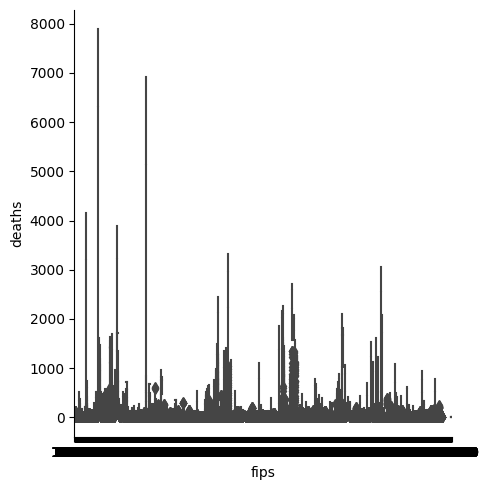

In [32]:
sns.catplot("fips","deaths",data=df,kind="box")

## Encoding the Categorical variable

In [18]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
X[:,0:2]=encoder.fit_transform(X[:,0:2])

In [19]:
X[:,0:1]

array([[1599.0],
       [1599.0],
       [1599.0],
       ...,
       [1763.0],
       [1826.0],
       [1850.0]], dtype=object)

In [20]:
X[:,1:2]

array([[51.0],
       [51.0],
       [51.0],
       ...,
       [54.0],
       [54.0],
       [54.0]], dtype=object)

In [21]:
dataset["deaths"].value_counts()

0.0        235150
1.0         87523
2.0         52427
3.0         35268
4.0         27478
            ...  
4934.0          1
5109.0          1
2493.0          1
23592.0         1
3060.0          1
Name: deaths, Length: 3168, dtype: int64

## Splitting of dataset into training set and testing set

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Selection

## Variance Threshold Technique

In [23]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [24]:
var_thres.get_support()

array([ True,  True,  True,  True])

## It means all the features have high variance which will be good for the prediction of dependent variable

## Correlation Technique

In [25]:
dataset.drop(["date"],axis=1,inplace=True)

In [26]:
X = dataset.drop("deaths",axis=1)   #Feature Matrix
y = dataset["deaths"] 

In [27]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
800432    10.0
800433     2.0
800434     5.0
800435     8.0
800436     2.0
Name: deaths, Length: 800437, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train.corr()

,fips,cases
fips,1.000000,-0.054191
cases,-0.054191,1.000000


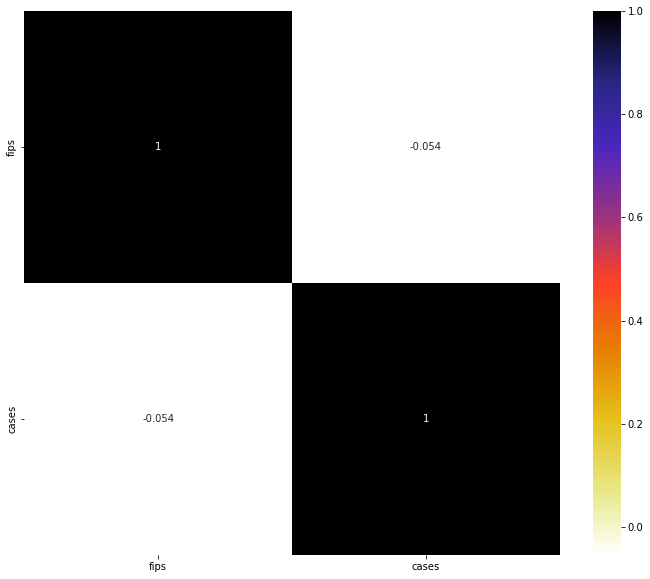

In [30]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr() ## finding the correlation in the training set over here for the machine learning model
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [31]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

# and we have taken this function code from the sklearn API
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

0

In [33]:
X_train

,county,state,fips,cases
428907,Madison,Kentucky,21151.0,603
798484,Mason,Michigan,26105.0,677
520633,Carolina,Puerto Rico,72031.0,2105
604472,Mitchell,North Carolina,37121.0,172
624489,Benton,Tennessee,47005.0,366
...,...,...,...,...
359783,Hood,Texas,48221.0,272
152315,Red River,Louisiana,22081.0,42
117952,Waller,Texas,48473.0,33
435829,Howell,Missouri,29091.0,173


In [23]:
X = dataset.iloc[:,0:-1].values  #Feature Matrix
y = dataset.iloc[:,-1].values

In [24]:
y=y.reshape(len(y),1)

In [25]:
X

array([['1/21/2020', 'Snohomish', 'Washington', 53061.0, 1],
       ['1/22/2020', 'Snohomish', 'Washington', 53061.0, 1],
       ['1/23/2020', 'Snohomish', 'Washington', 53061.0, 1],
       ...,
       ['12/5/2020', 'Uinta', 'Wyoming', 56041.0, 1187],
       ['12/5/2020', 'Washakie', 'Wyoming', 56043.0, 519],
       ['12/5/2020', 'Weston', 'Wyoming', 56045.0, 419]], dtype=object)

In [37]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="mean")
impute.fit(X[:,2:3])
X[:,2:3]=impute.transform(X[:,2:3])

In [38]:
impute.fit(y)
y=impute.transform(y)

In [39]:
dataset.isnull().sum()

county        0
state         0
fips       7591
cases         0
deaths    16733
dtype: int64

In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
X[:,0:2]=encoder.fit_transform(X[:,0:2])




In [41]:
X

array([[1599.0, 51.0, 53061.0, 1],
       [1599.0, 51.0, 53061.0, 1],
       [1599.0, 51.0, 53061.0, 1],
       ...,
       [1763.0, 54.0, 56041.0, 1187],
       [1826.0, 54.0, 56043.0, 519],
       [1850.0, 54.0, 56045.0, 419]], dtype=object)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
X_train

array([[1058.0, 18.0, 21151.0, 603],
       [1085.0, 23.0, 26105.0, 677],
       [281.0, 41.0, 72031.0, 2105],
       ...,
       [1812.0, 46.0, 48473.0, 33],
       [818.0, 26.0, 29091.0, 173],
       [1182.0, 47.0, 49029.0, 24]], dtype=object)

In [45]:
y_train

array([[ 1.       ],
       [12.       ],
       [48.8153091],
       ...,
       [ 0.       ],
       [ 2.       ],
       [ 0.       ]])

In [46]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

G:\PYTHON\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.85445278, 0.29057538, 1.15323995, 0.87283274])

In [50]:
X = dataset.drop("deaths",axis=1)   #Feature Matrix
y = dataset["deaths"] 

In [53]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

fips      1.153240
cases     0.872833
county    0.854453
state     0.290575
dtype: float64

<AxesSubplot:>

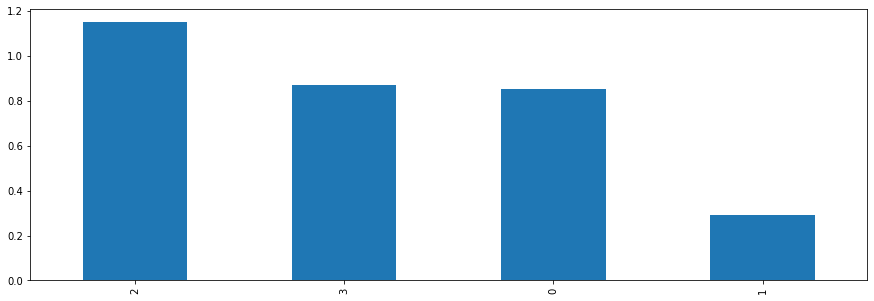

In [48]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

## This shows that there is less dependency of state for the prediction of dependent variable so therefore we will drop state column

In [23]:
dataset.drop(["state"],axis=1,inplace=True)

In [24]:

X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
y=y.reshape(len(y),1)

In [25]:
X

array([['Snohomish', 53061.0, 1],
       ['Snohomish', 53061.0, 1],
       ['Snohomish', 53061.0, 1],
       ...,
       ['Uinta', 56041.0, 1187],
       ['Washakie', 56043.0, 519],
       ['Weston', 56045.0, 419]], dtype=object)

In [26]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="mean")
impute.fit(X[:,1:2])
X[:,1:2]=impute.transform(X[:,1:2])

In [27]:
impute.fit(y)
y=impute.transform(y)

In [28]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
X[:,0:1]=encoder.fit_transform(X[:,0:1])

In [29]:
X[:,0:1]

array([[1599.0],
       [1599.0],
       [1599.0],
       ...,
       [1763.0],
       [1826.0],
       [1850.0]], dtype=object)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the machine learning model on the training set

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=25,random_state=0)
regressor.fit(X_train,y_train)

C:\Users\Manmeet Singh\AppData\Local\Temp\ipykernel_9796\2622531377.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=25, random_state=0)

## Predicting the test set results

In [32]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[ 0.    0.12]
 [ 1.    0.96]
 [49.   49.  ]
 ...
 [ 6.    6.  ]
 [ 0.    0.56]
 [ 1.    1.  ]]


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9992241712710332

## Making a single Prediction 

### suppose we want to predict number of deaths in Wyoming city of weston country with fips code equals to 56050 and 420 cases 


### Encoding for weston is 1850 and Encoding for Wyoming is 54

In [34]:
print(regressor.predict([[1850,56035,420]]))

[1.92]
